#**Sentiment Analysis of Social Media Posts:**

###***Using Twitter Posts***

###***Importing Dependencies***

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
nltk.download('stopwords')
nltk.download('punkt')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###***Reading Training Data***

In [2]:
train = pd.read_csv('/content/train.csv')
train_orignal = train.copy()

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


###***Reading Test Data***

In [5]:
test = pd.read_csv('/content/test.csv')
test_orignal = test.copy()

In [6]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [7]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


##*Data Pre-Processing*

###***Combining Datasets***

In [8]:
combine_data = pd.concat([train, test], ignore_index=True, sort=True)
combine_data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [9]:
combine_data.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [10]:
def remove_pattern(text,pattern):

    # re.findall() finds the pattern in the text and will put it in a list
    r = re.findall(pattern,text)

    # re.sub() will substitute all the @ with an empty character
    for i in r:
        text = re.sub(i,"",text)
    return text

###***Cleaning Tweets***

In [11]:
combine_data['Cleaned_Tweets'] = np.vectorize(remove_pattern)(combine_data['tweet'],"@[\w]*")

combine_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


###***Removing Symbols***

In [13]:
combine_data['Cleaned_Tweets'] = combine_data['Cleaned_Tweets'].str.replace("[^a-zA-Z#-#]"," ")

combine_data.head()

,id,label,tweet,Cleaned_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


###***Tokenization***

*Tokenize by applying Stemming and nltk*

In [14]:
tokenized_tweets = combine_data['Cleaned_Tweets'].apply(lambda x: x.split())

tokenized_tweets.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4             [factsguide:, society, now, #motivation]
Name: Cleaned_Tweets, dtype: object

###***Stemming***

In [15]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweets.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can't, use, cau...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide:, societi, now, #motiv]
Name: Cleaned_Tweets, dtype: object

In [16]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

combine_data['Clean_Tweets'] = tokenized_tweets
combine_data.head()

,id,label,tweet,Cleaned_Tweets,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,when a father is dysfunct and is so selfish he...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,thank for #lyft credit i can't use caus they d...
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: societi now #motiv


###***Data Visualisation***

*Visualize using WordCloud*

In [17]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [18]:
positive_words = ' '.join(text for text in combine_data['Cleaned_Tweets'][combine_data['label'] == 0])

In [19]:
# Generating images
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We will use the ImageColorGenerator to generate the color of the image
image_color = ImageColorGenerator(Mask)

# Now we will use the WordCloud function of the wordcloud library
wc = WordCloud(background_color='black',height=1500,width=4000,mask=Mask).generate(positive_words)

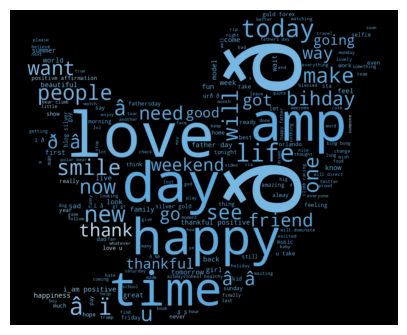

In [20]:
# Size of the image generated
plt.figure(figsize=(5,10))

# Here we recolor the words from the dataset to the image's color
# interpolation is used to smooth the image generated

plt.imshow(wc.recolor(color_func=image_color),interpolation="hamming")

plt.axis('off')
plt.show()


In [21]:
negative_words = ' '.join(text for text in combine_data['Clean_Tweets'][combine_data['label'] == 1])

In [22]:
# Combining Image with Dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(negative_words)

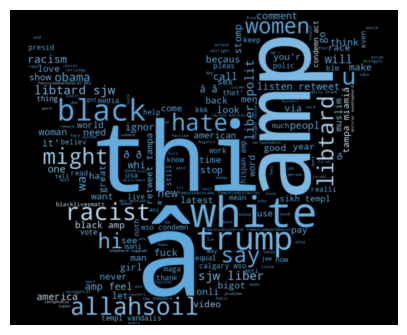

In [23]:
# Size of the image generated
plt.figure(figsize=(5,10))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

###***Extracting hashtags***

In [24]:
def extractHashtags(x):
    hashtags = []

    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)

    return hashtags

*Postive Hashtags*

In [25]:
positive_hashTags = extractHashtags(combine_data['Cleaned_Tweets'][combine_data['label'] == 0])

positive_hashTags

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'

In [26]:
positive_hastags_unnested = sum(positive_hashTags,[])
positive_hastags_unnested

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

*Negative Hashtags*

In [27]:
negative_hashtags = extractHashtags(combine_data['Cleaned_Tweets'][combine_data['label'] == 1])

In [28]:
negative_hashtags_unnest = (sum(negative_hashtags,[]))
negative_hashtags_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'medâ',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'â',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflictâ',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'p2',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'praised',
 'clevel

###***Bar plot for most frequesnt NEGATIVE and POSITIVE words***

*Positive words*

In [29]:
positive_word_freq = nltk.FreqDist(positive_hastags_unnested)

positive_word_freq

FreqDist({'love': 1531, 'positive': 874, 'healthy': 570, 'smile': 548, 'thankful': 491, 'fun': 434, 'life': 405, 'summer': 367, 'model': 364, 'affirmation': 363, ...})

In [30]:
positive_df = pd.DataFrame({'Hashtags': list(positive_word_freq.keys()),'Count' : list(positive_word_freq.values())})
positive_df

,Hashtags,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364
...,...,...
22760,ucsdâ,1
22761,berlincitygirl,1
22762,zÃ¼rich,1
22763,genf,1


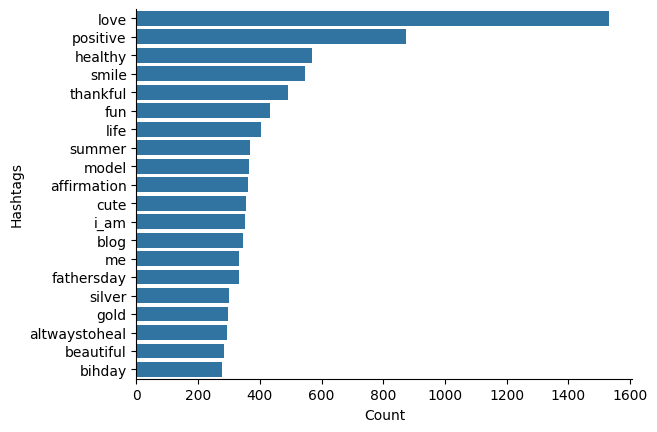

In [31]:
positive_df_plot = positive_df.nlargest(20,columns='Count')

sns.barplot(data=positive_df_plot,y='Hashtags',x='Count')
sns.despine()

*Negative words*

In [32]:
negative_word_freq = nltk.FreqDist(negative_hashtags_unnest)

negative_word_freq

FreqDist({'trump': 133, 'politics': 94, 'allahsoil': 92, 'libtard': 76, 'liberal': 75, 'sjw': 74, 'retweet': 57, 'black': 44, 'miamiâ': 38, 'hate': 32, ...})

In [33]:
negative_df = pd.DataFrame({'Hashtags':list(negative_word_freq.keys()),'Count':list(negative_word_freq.values())})

negative_df

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
...,...,...
1948,jumpedtheshark,1
1949,freemilo,5
1950,milo,4
1951,mailboxpride,1


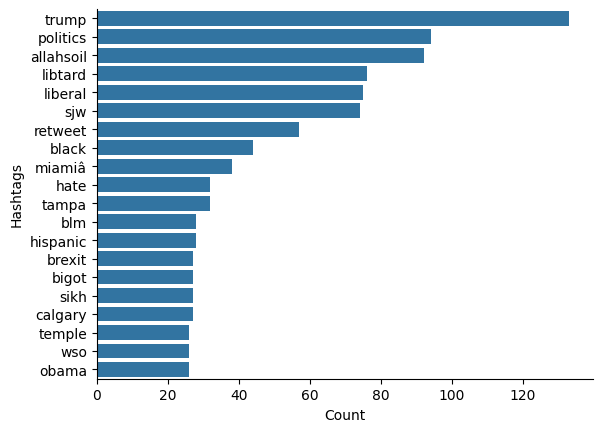

In [34]:
negative_df_plot = negative_df.nlargest(20,columns='Count')

sns.barplot(data=negative_df_plot,y='Hashtags',x='Count')
sns.despine()

###***Fr=eature Extraction***

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vecotrizer = CountVectorizer(max_df=0.90, min_df = 2, max_features = 1000, stop_words="english")

bow = bow_vecotrizer.fit_transform(combine_data['Cleaned_Tweets'])

bow_df = pd.DataFrame(bow.todense())

bow_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###***Applying Term Frequency (TF) & Inverse Document Frequency (IDF)***

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

tfidf_matrix = tfidf.fit_transform(combine_data['Cleaned_Tweets'])

tfidf_df = pd.DataFrame(tfidf_matrix.todense())

tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [39]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

###***Splitting the Data***

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

In [42]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

#***Applying ML Model***

###**Logistic Regression**

In [43]:
from sklearn.metrics import f1_score

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [46]:
log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [47]:
predict_bow = log_Reg.predict_proba(x_valid_bow)
predict_bow

array([[9.68579159e-01, 3.14208414e-02],
       [9.99840684e-01, 1.59315862e-04],
       [9.37966042e-01, 6.20339578e-02],
       ...,
       [9.70721936e-01, 2.92780637e-02],
       [9.45801647e-01, 5.41983534e-02],
       [9.42346741e-01, 5.76532590e-02]])

###***Calculating F1 Score***

In [49]:
# If prediction is more than or equal to 0.3 then 1 else 0
prediction_int = predict_bow[:,1] >=0.3

# Converting to integer type
prediction_int = prediction_int.astype(int)
prediction_int

# Calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.5560235888795282

###***Fitting TF - IDF Features***

In [50]:
log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [51]:
predict_tfidf = log_Reg.predict_proba(x_valid_tfidf)
predict_tfidf

array([[0.98764222, 0.01235778],
       [0.965986  , 0.034014  ],
       [0.94480008, 0.05519992],
       ...,
       [0.93206615, 0.06793385],
       [0.90265018, 0.09734982],
       [0.98320465, 0.01679535]])

In [53]:
prediction_int = predict_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(int)
prediction_int

log_tfidf = f1_score(y_valid_tfidf,prediction_int)
log_tfidf

0.572169403630078

###***Now predicting Test data***

In [55]:
test_tfidf = tfidf_matrix[31962:]
test_pred = log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

###***Results***

###**For Positive Label: 1**
###**For Negative Label: 0**

In [56]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


from matplotlib import pyplot as plt
res['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
res['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
res.plot(kind='scatter', x='id', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = res.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
res['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
res['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

###***Insights:***
#####F1 Score of Model: 0.5560235888795282 (Bag of Words)
#####Using Logistic Regression: 0.572169403630078